In [25]:
df<-read.csv('d:/data/zoo/zoo.csv')
head(df)

animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
girl,1,0,0,1,0,0,1,1,1,1,0,0,2,0,1,1,1


In [26]:
library(dplyr)
df<-df %>% select(-animal_name) #분석에 사용하지 않을 필드 제외
dim(df)
summary(df)

[1] 101  17

      hair           feathers          eggs             milk       
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.000   Median :1.0000   Median :0.0000  
 Mean   :0.4257   Mean   :0.198   Mean   :0.5842   Mean   :0.4059  
 3rd Qu.:1.0000   3rd Qu.:0.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  
    airborne         aquatic          predator         toothed     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :0.0000   Median :1.0000   Median :1.000  
 Mean   :0.2376   Mean   :0.3564   Mean   :0.5545   Mean   :0.604  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.000  
    backbone         breathes         venomous  

In [27]:
corrmatrix<-cor(df) #상관계수 행렬

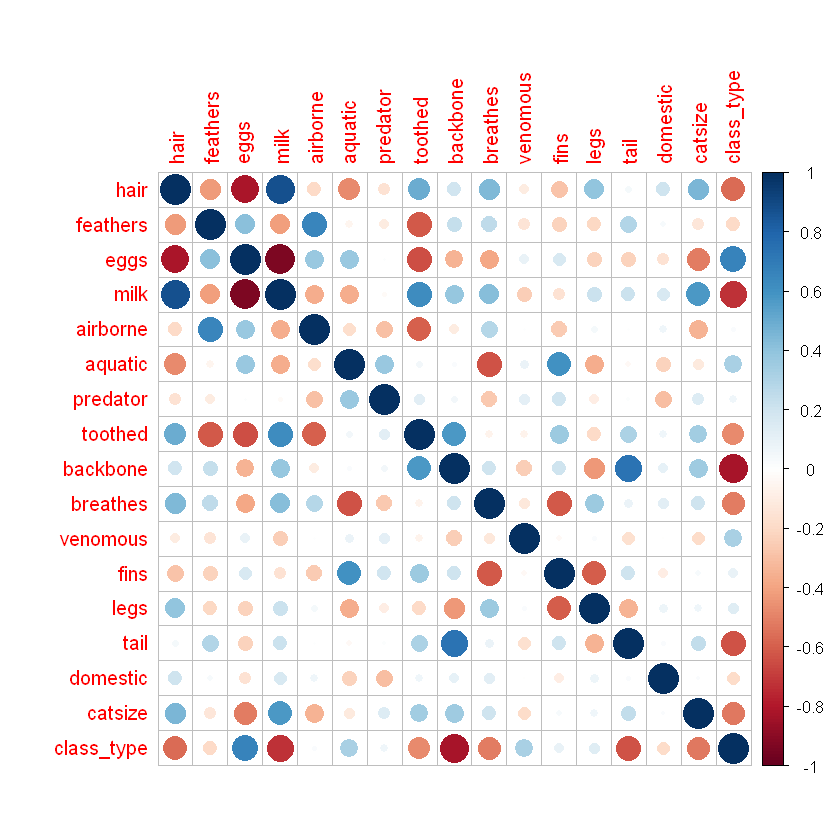

In [28]:
library(corrplot)
corrplot(corrmatrix,method='circle') #상관계수 플로팅


 1  2  3  4  5  6  7 
41 20  5 13  4  8 10 

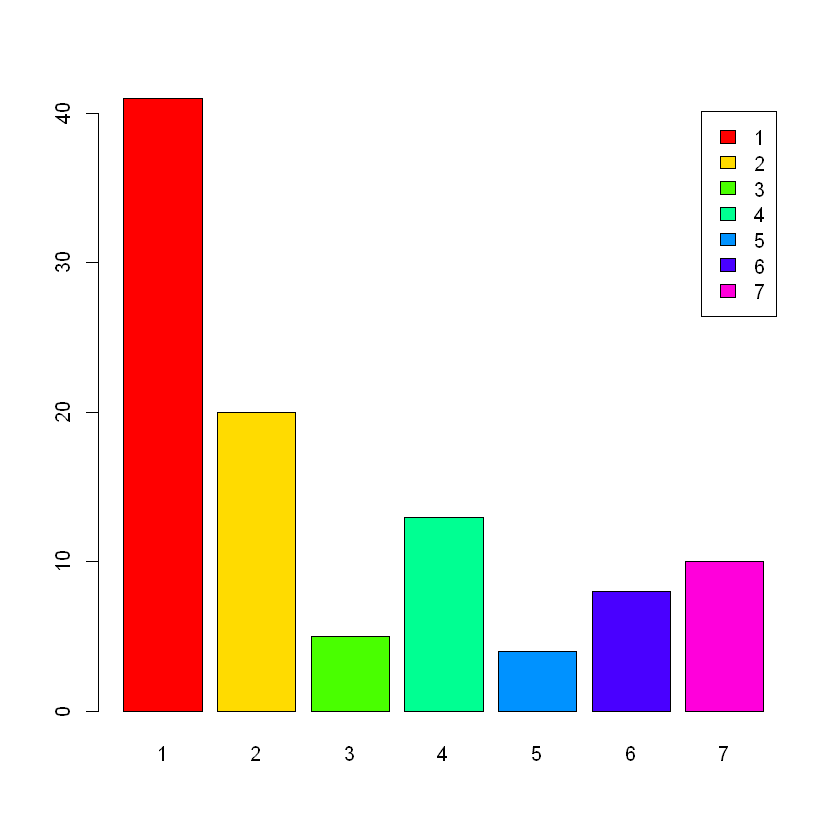

In [29]:
tbl <-table(df$class_type) #동물종류별로 카운트
tbl
barplot(tbl,beside=T,legend=T,col=rainbow(7)) #카운트 플롯

In [30]:
library(caret)
set.seed(123) #랜덤시드 고정
#학습용 80% p=0.8
idx_train<-createDataPartition(y=df$class_type, p=0.8, list=F)
train<-df[idx_train,] #학습용
X_train<-train[,-17] #17번 필드 제외
y_train<-train[,17] #17번 필드만 석택
test<-df[-idx_train,] #검증용
X_test<-test[,-17]
y_test<-test[,17]

In [31]:
library(nnet)
# 3 class 이상인 경우 multinom(), 2class glm()
model <- multinom(class_type~., data=train)
summary(model)

# weights:  126 (102 variable)
initial  value 159.564632 
iter  10 value 14.639530
iter  20 value 0.062257
iter  30 value 0.000254
final  value 0.000066 
converged


Call:
multinom(formula = class_type ~ ., data = train)

Coefficients:
  (Intercept)       hair    feathers      eggs      milk   airborne    aquatic
2  -2.1196063  -9.790763  34.6726754  5.925684 -19.86862   2.757845  -6.117143
3   0.8045264 -30.032670 -26.8386852  7.118747 -32.15749 -10.736848 -20.403973
4  -6.4815524   2.421395   1.6694950 22.826508 -19.62531   3.137490  -8.012985
5 -25.9392230 -17.522958  -2.1372370  6.163905 -19.41635  -2.182811  21.545224
6  -6.5622191 -11.190649   1.8237143 14.563971 -11.48963   4.537382  -8.517531
7  38.1273839 -16.001543  -0.2561737  5.120276 -13.83666  -3.104789  -2.526493
    predator    toothed    backbone   breathes   venomous       fins       legs
2   3.569612  -8.352689  -0.6318833  -9.626850  0.1032884  -0.892964  4.8401543
3  -4.429805   6.258108  23.6754708  -8.496247 12.7723192 -26.805049  0.2990506
4  -2.488829   3.358352   1.2919174 -25.095137  5.9170598  11.436099  2.7207158
5  -4.728406  12.149233   8.0770318  17.347863 -4.9610265

In [32]:
(coef1<-coef(model)) #회귀계수

,(Intercept),hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
2,-2.1196063,-9.790763,34.6726754,5.925684,-19.86862,2.757845,-6.117143,3.569612,-8.352689,-0.6318833,-9.626850,0.1032884,-0.892964,4.8401543,-3.894958,2.0134907,-6.571879
3,0.8045264,-30.032670,-26.8386852,7.118747,-32.15749,-10.736848,-20.403973,-4.429805,6.258108,23.6754708,-8.496247,12.7723192,-26.805049,0.2990506,16.686785,-4.0172487,-4.335050
4,-6.4815524,2.421395,1.6694950,22.826508,-19.62531,3.137490,-8.012985,-2.488829,3.358352,1.2919174,-25.095137,5.9170598,11.436099,2.7207158,3.719799,0.3178114,2.084939
5,-25.9392230,-17.522958,-2.1372370,6.163905,-19.41635,-2.182811,21.545224,-4.728406,12.149233,8.0770318,17.347863,-4.9610265,-11.202759,4.3951756,-10.739926,-4.9741391,-13.271282
6,-6.5622191,-11.190649,1.8237143,14.563971,-11.48963,4.537382,-8.517531,-15.209986,-4.219293,-8.3365129,6.501106,-7.4632143,8.495105,6.4315335,-8.216402,-9.9655960,-10.806203
7,38.1273839,-16.001543,-0.2561737,5.120276,-13.83666,-3.104789,-2.526493,19.391122,-11.480897,-39.4788032,-7.071123,17.4684606,-2.671947,-0.6392837,-1.961452,5.4838334,-8.422901


In [33]:
#검증용 데이터셋을 모형에 입력하여 예측정확도 테스트
pred<-predict(model,newdata=X_test, type='probs')
result<-ifelse(pred>0.5,1,0) #0.5보다 크면 1, 아니면 0
head(result) #예측값
head(y_test) #실제값

,1,2,3,4,5,6,7
5,0,1,0,0,0,0,0
9,0,0,0,0,0,0,1
13,1,0,0,0,0,0,0
19,1,0,0,0,0,0,0
20,0,0,0,1,0,0,0
26,0,1,0,0,0,0,0


[1] 2 6 1 1 4 2

In [34]:
# 2차원 result를 1차원 new_result로 바꾸는 코드
new_result=c() #비어있는 벡터
for(i in 1:nrow(result)){ #nrow() 행의 수
    for(j in 1:ncol(result)){ #ncol() 필드수
        if(result[i,j]==1){ #[행,열] 값이 1이면
            new_result[i] = j #새로운 리스트에 저장
        }
    }
}

In [35]:
y_test==new_result

[1]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [36]:
mean(y_test==new_result)

[1] 0.8947368

In [37]:
table(y_test,new_result)

      new_result
y_test 1 2 3 4 5 6 7
     1 7 0 0 0 0 0 0
     2 0 5 0 0 0 0 0
     3 0 0 1 0 0 0 0
     4 0 0 0 2 0 0 0
     5 0 0 0 0 1 0 0
     6 0 0 0 0 0 1 2